In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('./Data/GBIMEfinal.csv')
df

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.shape

In [ ]:
df.set_index(pd.to_datetime(df['t']), inplace=True)
df

In [ ]:
df.drop('t',axis=1,inplace=True)
df

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['c'])
plt.xlabel('t',fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [ ]:
ma100 = df.c.rolling(100).mean()
ma100

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.c)
plt.plot(ma100,'r')

In [ ]:
ma200 = df.c.rolling(200).mean()
ma200

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.c)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
#dataframe with only close price
data = df.filter(['c'])

#convert the df to a numpy array
dataset = data.values

# get the number of rows to train the model on

training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

In [ ]:
dataset.shape

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

In [ ]:
#training the dataset
train_data = scaled_data[0:training_data_len,:]

#split the data into x_train and y_train 
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

    if i<=61:
        print(x_train)
        print(y_train)
        print()


In [ ]:
#convert the x train and y train to numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)

In [ ]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

In [ ]:
#build the lstm model

model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))
model.add(Dense(units=1))

model.add(LSTM(units = 120, activation='tanh'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 dense (Dense)               (None, 60, 1)             51        
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            14880     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [33]:
#train the model
model.fit(x_train, y_train, batch_size=25,epochs=1)

62/62 [==============================] - 41s 267ms/step - loss: 0.0222


In [34]:
#create the testing dataset
test_data = scaled_data [training_data_len-60:,:]

#create dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [35]:
#convert data to a numpy array
x_test = np.array(x_test)


In [36]:
#reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [37]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

13/13 [==============================] - 2s 54ms/step


array([[197.85179],
       [197.90915],
       [197.96669],
       [198.0255 ],
       [198.0867 ],
       [198.15175],
       [198.22192],
       [198.29868],
       [198.38368],
       [198.47815],
       [198.58342],
       [198.70085],
       [198.83144],
       [198.97586],
       [199.13377],
       [199.3054 ],
       [199.49031],
       [199.68675],
       [199.89299],
       [200.10666],
       [200.3242 ],
       [200.54283],
       [200.7596 ],
       [200.9713 ],
       [201.1754 ],
       [201.36983],
       [201.55325],
       [201.7242 ],
       [201.88179],
       [202.0254 ],
       [202.154  ],
       [202.2673 ],
       [202.36574],
       [202.44955],
       [202.5201 ],
       [202.57797],
       [202.62434],
       [202.66005],
       [202.68597],
       [202.70299],
       [202.71274],
       [202.71655],
       [202.71556],
       [202.7111 ],
       [202.70396],
       [202.6953 ],
       [202.68633],
       [202.67789],
       [202.6708 ],
       [202.66559],


In [38]:
#get the root mean squared erro(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

122.60352815094659

C:\Users\97798\AppData\Local\Temp\ipykernel_9160\3811046830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


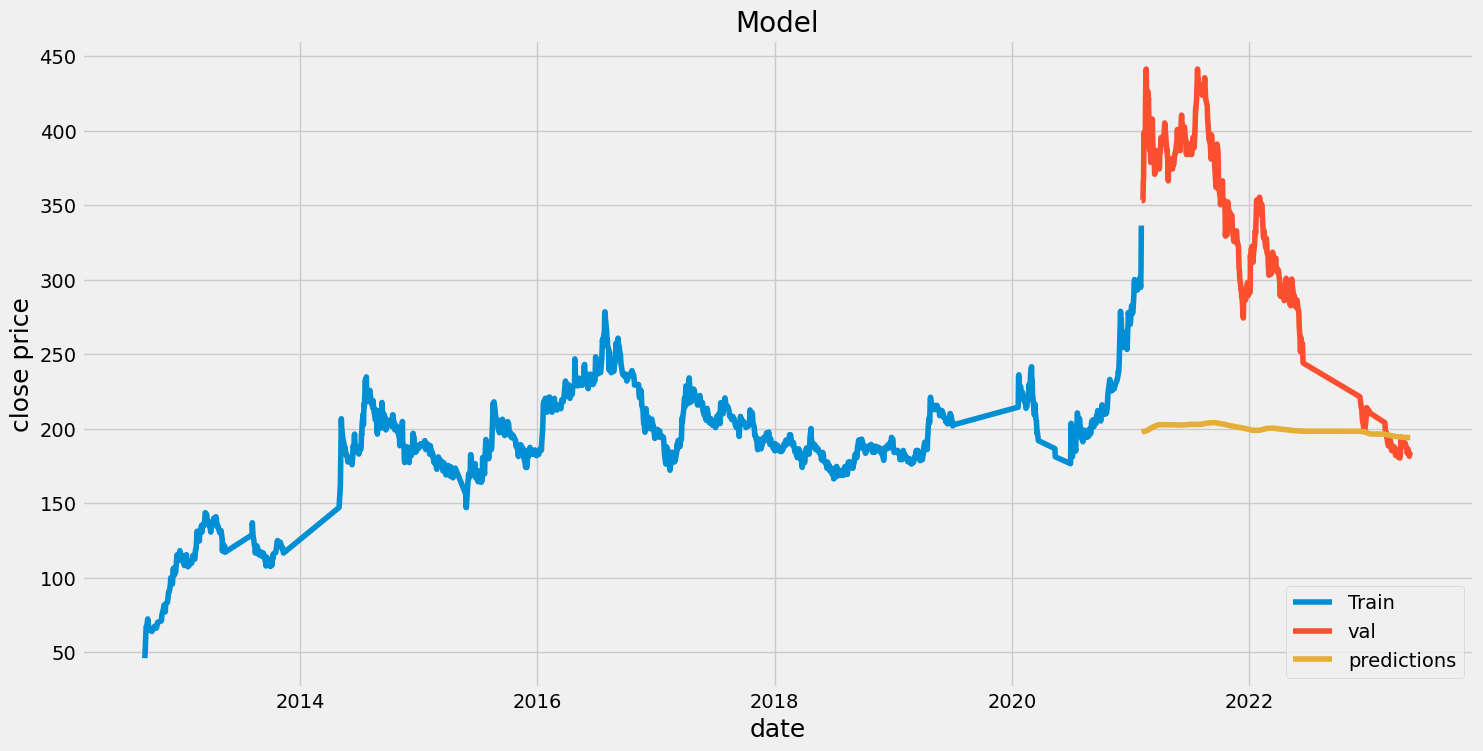

In [39]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

#visualise
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(train['c'])
plt.plot(valid[['c','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show()

In [40]:
valid['predictions'] = predictions
predictions = np.array(predictions).flatten()
predictions

C:\Users\97798\AppData\Local\Temp\ipykernel_9160\111186762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


array([197.85179, 197.90915, 197.96669, 198.0255 , 198.0867 , 198.15175,
       198.22192, 198.29868, 198.38368, 198.47815, 198.58342, 198.70085,
       198.83144, 198.97586, 199.13377, 199.3054 , 199.49031, 199.68675,
       199.89299, 200.10666, 200.3242 , 200.54283, 200.7596 , 200.9713 ,
       201.1754 , 201.36983, 201.55325, 201.7242 , 201.88179, 202.0254 ,
       202.154  , 202.2673 , 202.36574, 202.44955, 202.5201 , 202.57797,
       202.62434, 202.66005, 202.68597, 202.70299, 202.71274, 202.71655,
       202.71556, 202.7111 , 202.70396, 202.6953 , 202.68633, 202.67789,
       202.6708 , 202.66559, 202.66277, 202.66238, 202.6645 , 202.66878,
       202.67476, 202.68185, 202.68927, 202.69603, 202.70174, 202.70522,
       202.7055 , 202.70293, 202.69807, 202.69078, 202.68062, 202.66817,
       202.65276, 202.63551, 202.61728, 202.59688, 202.57541, 202.55397,
       202.53369, 202.51472, 202.49702, 202.48169, 202.46886, 202.45955,
       202.45435, 202.45224, 202.4538 , 202.45874, 

In [41]:
valid

,c,predictions
t,,
2021-02-03 14:59:59,353.045013,197.851791
2021-02-04 14:59:59,353.045013,197.909149
2021-02-07 14:59:59,353.045013,197.966690
2021-02-08 14:59:59,365.401589,198.025497
2021-02-09 14:59:59,368.049426,198.086700
...,...,...
2023-05-07 14:59:40,183.000000,194.086929
2023-05-08 14:59:40,181.500000,194.087341
2023-05-09 14:59:40,183.200000,194.088287


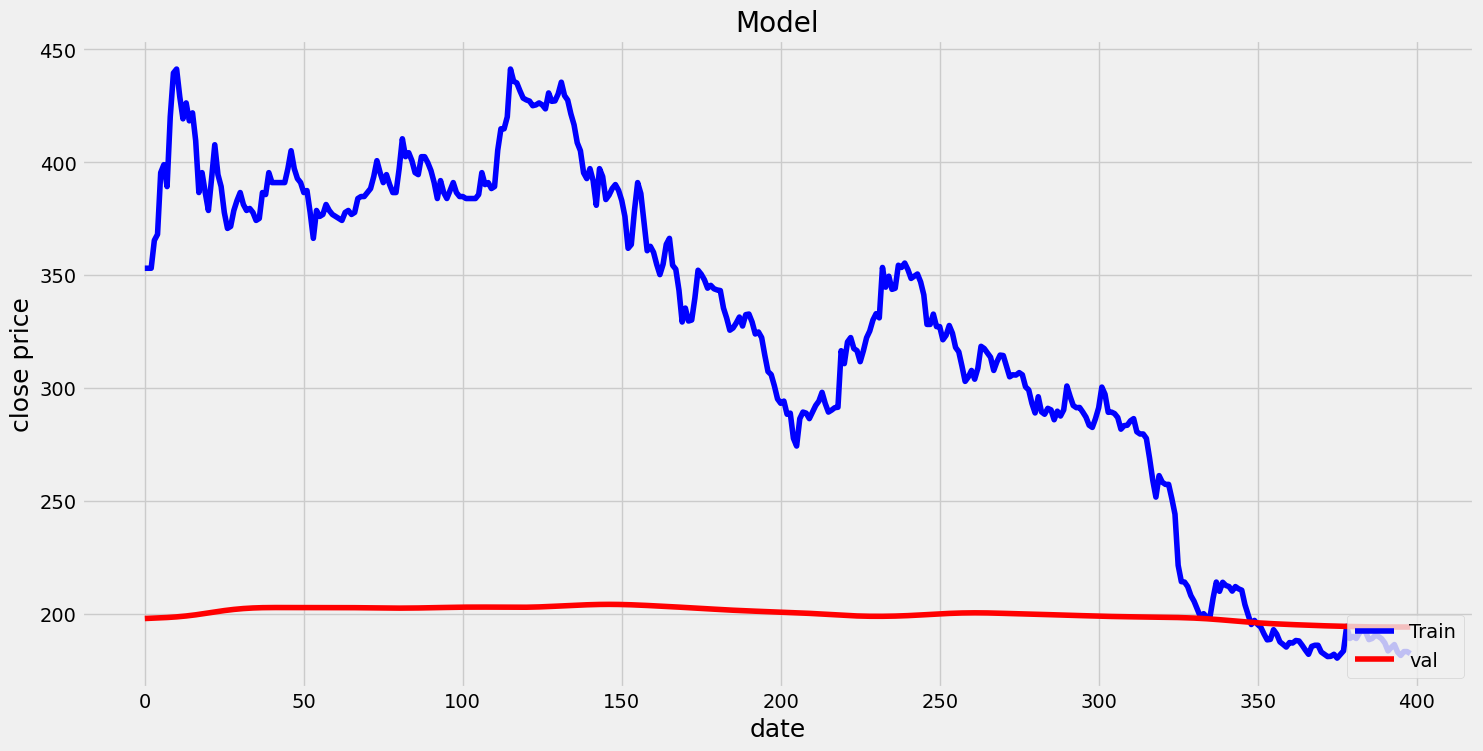

In [42]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(y_test,'b', label='Original Price')
plt.plot(predictions,'r', label='Predicted Price')
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show()

ModellNotSupported: This model type is not currently supported. Email support@mlrequest.com to request a feature or report a bug.